# Sidhant Pradhan - 19A2HP414

## Predicting sales

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
Adv = pd.read_csv( r'Advertising.csv' )

In [3]:
Adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Sno          200 non-null int64
TV           199 non-null float64
Radio        199 non-null float64
Newspaper    199 non-null float64
Day          197 non-null object
Sales        200 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


###  MISSING VALUES AND DELETE THE ROWS

In [4]:
Adv.isnull().values.any()

True

In [5]:
# So there are some null values in this data set.

In [6]:
Adv = Adv.dropna() # remove missing value rows

In [7]:
Adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
Sno          197 non-null int64
TV           197 non-null float64
Radio        197 non-null float64
Newspaper    197 non-null float64
Day          197 non-null object
Sales        197 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [8]:
# After this step, we deleted 3 rows from Sno and Sales,2 rows from TV, Newspaper and Radio.

In [9]:
Adv.head(5)

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6


In [10]:
Adv['Day'] = Adv['Day'].astype(str)

In [11]:
Adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
Sno          197 non-null int64
TV           197 non-null float64
Radio        197 non-null float64
Newspaper    197 non-null float64
Day          197 non-null object
Sales        197 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


###  Encode the Categorical Variables 

In [12]:
Adv['Day'].unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [13]:
pd.get_dummies(Adv['Day'])[0:10]

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [14]:
X_load = ['TV', 'Radio', 'Newspaper', 'Day']

In [15]:
Adv_encoded = pd.get_dummies( Adv[X_load], drop_first = True )

In [16]:
Adv_encoded.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

In [17]:
X_load = Adv_encoded.columns

In [18]:
X_load

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

###  DESCRIPTIVE SUMMARY

In [19]:
Adv[["TV", "Radio","Newspaper","Sales"]].describe()

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,14.102030
std,85.439138,14.922793,20.972370,5.192302
min,0.700000,0.000000,0.300000,1.600000
25%,74.700000,9.900000,12.900000,10.400000
50%,149.700000,22.300000,25.900000,12.900000
75%,218.400000,36.500000,45.100000,17.400000
max,296.400000,49.600000,100.900000,27.000000


In [20]:
Adv_encoded.describe()

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000


### VISUALIZATION

In [21]:
get_ipython().magic('matplotlib inline')
import seaborn as sn
import matplotlib.pyplot as plt

In [22]:
Adv.corr()

,Sno,TV,Radio,Newspaper,Sales
Sno,1.000000,0.023044,-0.102923,-0.143636,0.006161
TV,0.023044,1.000000,0.055658,0.095794,0.047781
Radio,-0.102923,0.055658,1.000000,0.356668,0.001630
Newspaper,-0.143636,0.095794,0.356668,1.000000,-0.027103
Sales,0.006161,0.047781,0.001630,-0.027103,1.000000


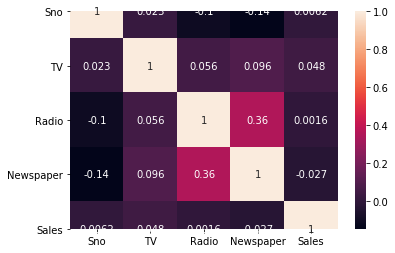

In [23]:
sn.heatmap( Adv.corr(), annot = True )

In [24]:
Adv_encoded.corr()

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
TV,1.000000,0.055658,0.095794,-0.701157,0.661571
Radio,0.055658,1.000000,0.356668,0.001294,-0.004410
Newspaper,0.095794,0.356668,1.000000,-0.121552,0.097357
Day_Weekdays,-0.701157,0.001294,-0.121552,1.000000,-0.943123
Day_Weekend,0.661571,-0.004410,0.097357,-0.943123,1.000000


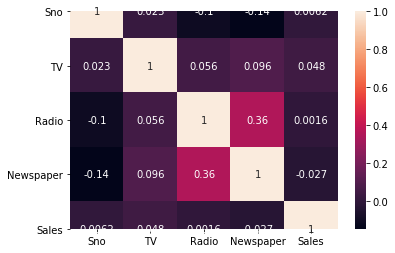

In [25]:
sn.heatmap( Adv.corr(), annot = True )

In [26]:
# There is no auto correlation in these variables.
# Radio and Newspaper show highest correlation with 36&

In [27]:
Day_sales = Adv.groupby('Day')['Sales'].mean().reset_index()

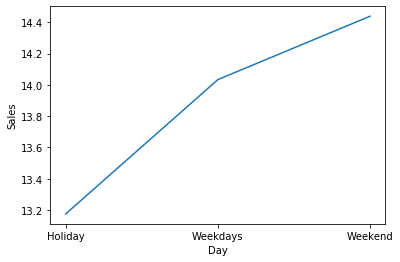

In [28]:
sn.lineplot( x = 'Day', y = 'Sales', data = Day_sales )

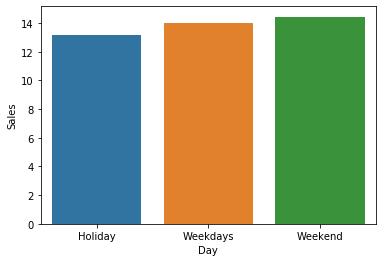

In [29]:
sn.barplot( x = 'Day', y = 'Sales', data = Day_sales )

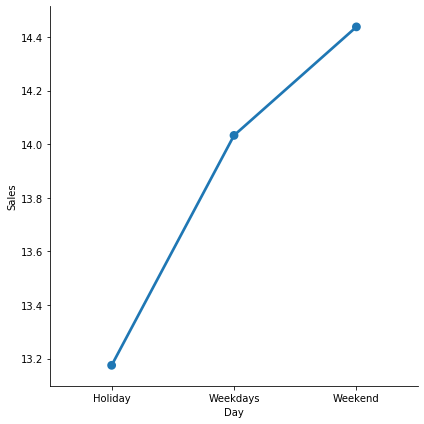

In [30]:
sn.catplot( x = 'Day', y = 'Sales', kind = 'point', data = Day_sales, height = 6 )

In [31]:
# Day varibale is a significant for sales and sales are high on weekend and low on holiday as refer most people are free and willing to purchase on weekand rather than holiday  

### Split the dataset

In [32]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant( Adv_encoded )
Y = Adv['Sales']
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7,random_state = 62 ) # split the dataset as Train and Test in 70:30

### Train the model using Multtple Linear Regression Model

In [33]:
Sales_model_1 = sm.OLS(train_y, train_X).fit()
Sales_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.023  
Dependent Variable: Sales            AIC:                856.0133
Date:               2020-08-12 20:10 BIC:                873.5332
No. Observations:   137              Log-Likelihood:     -422.01 
Df Model:           5                F-statistic:        0.4007  
Df Residuals:       131              Prob (F-statistic): 0.848   
R-squared:          0.015            Scale:              29.008  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         12.6232    3.3377   3.7820  0.0002   6.0204  19.2261
TV             0.0037    0.0071   0.5180  0.6054  -0.0104   0.0178
Radio          0.0264    0.0331   0.7967  0.4271  -0.0391   0.0918
Newspaper     -0.0241    0.0237  -1.0158  0.3116  -0.0710   0.0228
Day_Weekdays   1.0103    2.9410   0.3435  0.7318  -4.8078   6.8284
Day_Weekend   -0.1513    2.9295  -0.0516  0.9589  -5.9466   5.6440
-----------------------------------------------------------------
Omnibus:              6.018        Durbin-Watson:           2.047
Prob(Omnibus):        0.049        Jarque-Bera (JB):        6.149
Skew:                 0.493        Prob(JB):                0.046
Kurtosis:             2.675        Condition No.:           1842 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### Multi-Collinearity - VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.as_matrix()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors


In [35]:
vif_factors = get_vif_factors( X[X_load] )
vif_factors

,column,vif
0,TV,5.972512
1,Radio,3.930583
2,Newspaper,3.499641
3,Day_Weekdays,4.513938
4,Day_Weekend,4.048673


In [36]:
larger_vif = vif_factors[vif_factors.vif > 4].column

In [37]:
larger_vif

0              TV
3    Day_Weekdays
4     Day_Weekend
Name: column, dtype: object

In [38]:
columns_to_be_removed = ['TV', 'Day_Weekdays', 'Day_Weekend']

In [39]:
X_new_load = list( set(X_load) - set(columns_to_be_removed) )
X_new_load

['Radio', 'Newspaper']

In [40]:
get_vif_factors( X[X_new_load] )

,column,vif
0,Radio,2.804843
1,Newspaper,2.804843


In [41]:
train_X = train_X[X_new_load]
Sales_model_2 = sm.OLS(train_y, train_X).fit()
Sales_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.646   
Dependent Variable:     Sales            AIC:                         987.0019
Date:                   2020-08-12 20:10 BIC:                         992.8419
No. Observations:       137              Log-Likelihood:              -491.50 
Df Model:               2                F-statistic:                 125.9   
Df Residuals:           135              Prob (F-statistic):          1.39e-31
R-squared (uncentered): 0.651            Scale:                       77.636  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Radio          0.2876        0.0455      6.3187      0.0000      0.1976      0.3777
Newspaper      0.1289        0.0347      3.7158      0.0003      0.0603      0.1975
------------------------------------------------------------------------------
Omnibus:                  0.250             Durbin-Watson:               1.630
Prob(Omnibus):            0.883             Jarque-Bera (JB):            0.418
Skew:                     -0.039            Prob(JB):                    0.811
Kurtosis:                 2.741             Condition No.:               3    
==============================================================================

"""

In [42]:
# Radio, Newspaper variables are signifiant variables.

### Residual Analysis
#### P-P Plot

<Figure size 576x432 with 0 Axes>

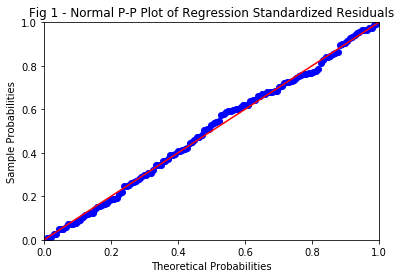

In [43]:
probplot = sm.ProbPlot(Sales_model_2.resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

Text(0, 0.5, 'Standardized residual values')

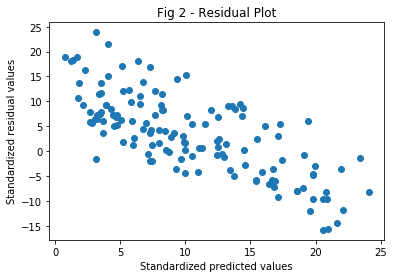

In [44]:
plt.scatter(Sales_model_2.fittedvalues, Sales_model_2.resid)
plt.title ('Fig 2 - Residual Plot')
plt.xlabel ( "Standardized predicted values")
plt.ylabel( "Standardized residual values")

### Detecting Influencers

In [45]:
k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 2  and number of observations: 137
Cutoff for leverage value:  0.066


In [46]:
from statsmodels.graphics.regressionplots import influence_plot

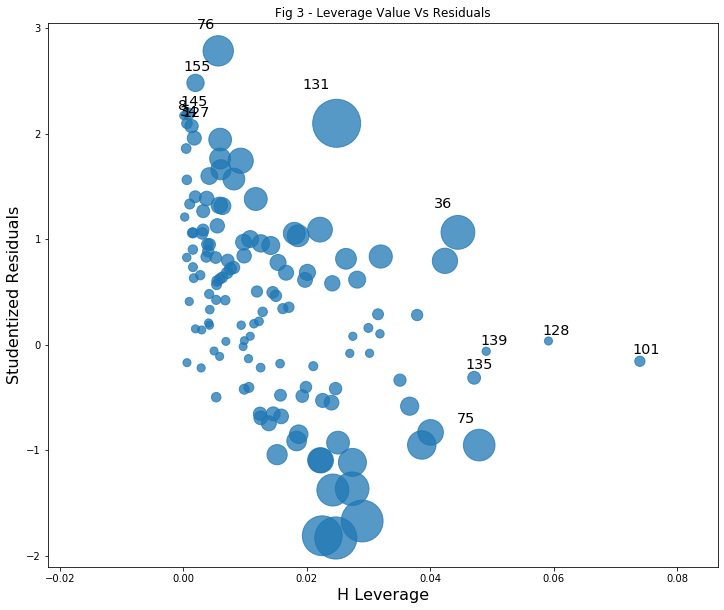

In [47]:
fig, ax = plt.subplots( figsize=(12,10) )
influence_plot( Sales_model_2, ax = ax )
plt.title( "Fig 3 - Leverage Value Vs Residuals")
plt.show()

### # Cooks Distance

Text(0, 0.5, 'Cooks Distance')

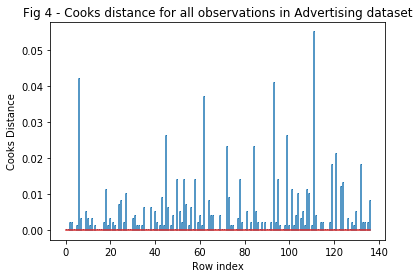

In [48]:
import numpy as np
Sales_influence = Sales_model_2.get_influence()
(c, p) = Sales_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Fig 4 - Cooks distance for all observations in Advertising dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance")

In [49]:
Adv[Adv.index.isin( [101, 128] )]

,Sno,TV,Radio,Newspaper,Day,Sales
101,102,296.4,36.3,100.9,Weekend,22.1
128,129,220.3,49.0,3.2,Weekdays,14.8


In [50]:
train_X_new1 = train_X.drop( [101], axis = 0)
train_y_new1 = train_y.drop( [101], axis = 0)

In [51]:
import numpy as np
train_y = np.sqrt( train_y )

In [52]:
Sales_model_3= sm.OLS(train_y, train_X).fit()
Sales_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.715   
Dependent Variable:     Sales            AIC:                         578.7895
Date:                   2020-08-12 20:10 BIC:                         584.6294
No. Observations:       137              Log-Likelihood:              -287.39 
Df Model:               2                F-statistic:                 172.5   
Df Residuals:           135              Prob (F-statistic):          6.50e-38
R-squared (uncentered): 0.719            Scale:                       3.9447  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Radio          0.0723        0.0103      7.0460      0.0000      0.0520      0.0926
Newspaper      0.0369        0.0078      4.7185      0.0000      0.0214      0.0524
------------------------------------------------------------------------------
Omnibus:                  4.420             Durbin-Watson:               1.543
Prob(Omnibus):            0.110             Jarque-Bera (JB):            4.056
Skew:                     -0.351            Prob(JB):                    0.132
Kurtosis:                 2.533             Condition No.:               3    
==============================================================================

"""

<Figure size 576x432 with 0 Axes>

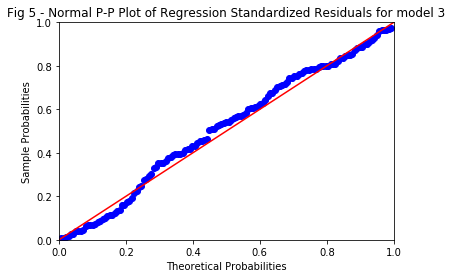

In [53]:
probplot = sm.ProbPlot(Sales_model_3.resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 5 - Normal P-P Plot of Regression Standardized Residuals for model 3" )
plt.show()

### Making Predictions

In [54]:
pred_y = np.power( Sales_model_3.predict( test_X[train_X.columns] ), 2)

In [55]:
pred_y[0:10]

48      8.899432
162     5.076196
33      2.123084
37     27.641871
41     14.764873
104     7.157943
110     7.167316
89     28.645499
5      39.718959
27      4.211590
dtype: float64

### RMSE

In [56]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

11.435018816122266

### R-squared value

In [57]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

-0.61

In [58]:
Adv_encoded.describe()

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000


In [59]:
train_X.describe()

,Radio,Newspaper
count,137.000000,137.000000
mean,22.797080,29.130657
std,15.386864,21.325315
min,0.000000,1.000000
25%,8.400000,11.600000
50%,21.100000,23.700000
75%,36.900000,41.400000
max,49.600000,100.900000


In [60]:
# MODEL 1:
#  TV+ Radio+ Newspaper+ Day_Weekdays+ Day_Weekend = Daily sales
# (146.242132*0.0037)+(23.152284*0.0264)+(30.375635*-0.0241)+(0.766497*1.0103)+(0.213198*-0.1513) = 1.16239844

In [61]:
# MODEL 3:
# Radio+ Newspaper = Daily sales
# (22.797080*0.0723)+(29.130657*0.0723) = 3.75437539